In [20]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
bos_cal = pd.read_csv("calendar.csv", parse_dates=["date"])
bos_listing = pd.read_csv("listings.csv")
bos_reviews = pd.read_csv("reviews.csv")

# Boston Data (Data Understanding)

In [22]:
#Calendar Data
#I looked at the shapes of the dataframes that I will be working.
bos_cal.shape

(1308890, 4)

In [23]:
#Listing Data
bos_listing.shape

(3585, 95)

In [24]:
#Reviews
bos_reviews.shape

(68275, 6)

In [25]:
bos_cal.head(2) #Looking at the dataframes to get familiar with the data. 
                #I assume that if host is not available that is mean it is booked
                #So with that I can show occupancy rates of every month to see if there is a any seasonality.

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [26]:
bos_listing.head(2) #Looking at the dataframes to get familiar with the data.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [27]:
list(bos_listing.columns) #I checked all columns to understand what can I do with that data.

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [28]:
bos_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [29]:
#Checking missing data..

In [30]:
bos_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

In [31]:
bos_listing.isnull().sum()[bos_listing.isnull().sum() != 0]

summary                          143
space                           1057
neighborhood_overview           1415
notes                           1975
transit                         1290
access                          1489
interaction                     1554
house_rules                     1192
thumbnail_url                    599
medium_url                       599
xl_picture_url                   599
host_location                     11
host_about                      1309
host_response_time               471
host_response_rate               471
host_acceptance_rate             471
host_neighbourhood               339
neighbourhood                    543
neighbourhood_group_cleansed    3585
city                               2
zipcode                           38
market                            14
property_type                      3
bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3529
w

In [32]:
bos_cal.isnull().sum() #There are lots of missing values for price. That is because unavailable hosts don't have price.

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [33]:
bos_cal.info() #checking for datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null object
price         643037 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [34]:
#Using missing values in prica column I calculated idle times of the airBnB houses. 

In [35]:
print("{:.3}% idle time.".format(bos_cal.isnull().sum()[3]/bos_cal.shape[0]*100))

50.9% idle time.


In [36]:
bos_cal["available"].value_counts()

f    665853
t    643037
Name: available, dtype: int64

# 1. Question: In which months occupancy rates increases?

In [37]:
bos_cal.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [38]:
bos_cal[bos_cal["available"] == "f"]["price"].unique() #I assume that if host is not available that means it has guests.

array([nan], dtype=object)

In [39]:
bos_cal["price"].unique() #Price is entered as string, I may need to get rid of that dollar sign.

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

In [40]:
bos_cal1=bos_cal.set_index("date") #I set index as date because I will seperate data point which respect to date.

In [41]:
bos_cal1["2017-08"]["available"].value_counts() 

f    55605
t    55561
Name: available, dtype: int64

In [42]:
print("Occupancy rate of August 2017 is {:.3}%".format(bos_cal1["2017-08"]["available"].value_counts()[0]/bos_cal1["2017-08"].shape[0]*100))

Occupancy rate of August 2017 is 50.0%


In [43]:
bos_cal["date"].min()

Timestamp('2016-09-06 00:00:00')

In [44]:
bos_cal["date"].max()

Timestamp('2017-09-05 00:00:00')

In [45]:
listOfMonths = ["2016-9","2016-10","2016-11","2016-12","2017-01","2017-02"
               ,"2017-03","2017-04","2017-05","2017-06","2017-07","2017-08"]

occRateDict = {}

for month in listOfMonths:
    occRateDict[month]=bos_cal1[month]["available"].value_counts()[0]/bos_cal1[month].shape[0]*100

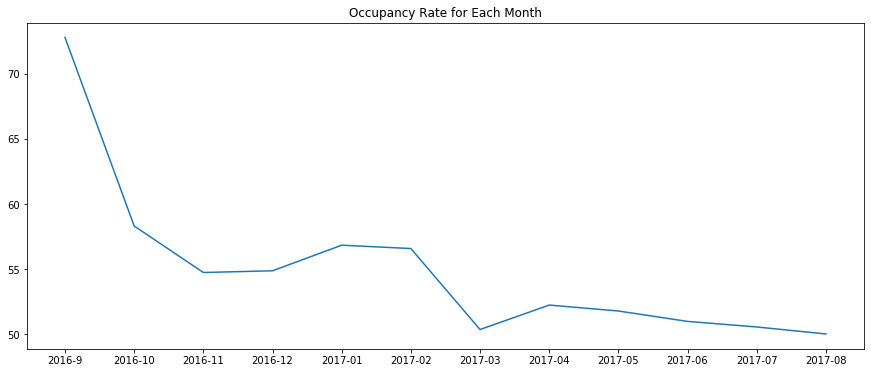

In [48]:
plt.figure(figsize=(15,6))
plt.title("Occupancy Rate for Each Month")
plt.plot(list(occRateDict.keys()),list(occRateDict.values()));

In [49]:
#I couldn't find any seasonality. So I wonder if there any relationship between occupancy rate and average room price.

# 2. Question: Average room price for every month?

In [50]:
#To calculate average room prices for each month I need to convert data type of price column from string to float

In [51]:
def returnPricesAsInt(i):
    "takes price data with dollar sign and converts it to float"
    if i[0] == "$":
        i = i[1:]

    if i[-3:] == ".00":
        i = i[:-3]
        
    if "," in i:
        i = i.replace("," ,"")
    
    i = float(i)
    return i

In [52]:
print("Mean room price for 2017 August is {:.4}$".format(bos_cal1["2017-8"]["price"].dropna().apply(returnPricesAsInt).mean()))

Mean room price for 2017 August is 203.3$


In [53]:
listOfMonths = ["2016-9","2016-10","2016-11","2016-12","2017-01","2017-02"
               ,"2017-03","2017-04","2017-05","2017-06","2017-07","2017-08"]

avgRoomPrice = {}

for month in listOfMonths:
    avgRoomPrice[month] = bos_cal1[month]["price"].dropna().apply(returnPricesAsInt).mean()

In [55]:
avgRoomPrice #calculated average airbnb price for each month to see if there is a relationship with occupancy rates.

{'2016-9': 252.67730830703658,
 '2016-10': 233.4162477074118,
 '2016-11': 202.9244158402391,
 '2016-12': 192.60191484827124,
 '2017-01': 182.7996707871037,
 '2017-02': 180.96102798803028,
 '2017-03': 181.81874195828274,
 '2017-04': 197.25289011716166,
 '2017-05': 193.7122947761194,
 '2017-06': 196.5353018148717,
 '2017-07': 202.4863089714899,
 '2017-08': 203.33014164611868}

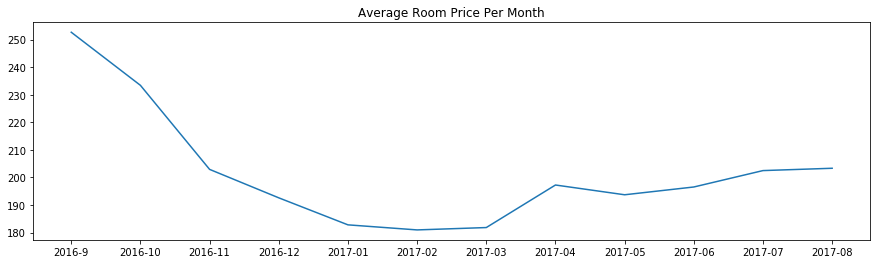

In [56]:
plt.figure(figsize=(15,4))
plt.plot(list(avgRoomPrice.keys()),list(avgRoomPrice.values()));
plt.title("Average Room Price Per Month");

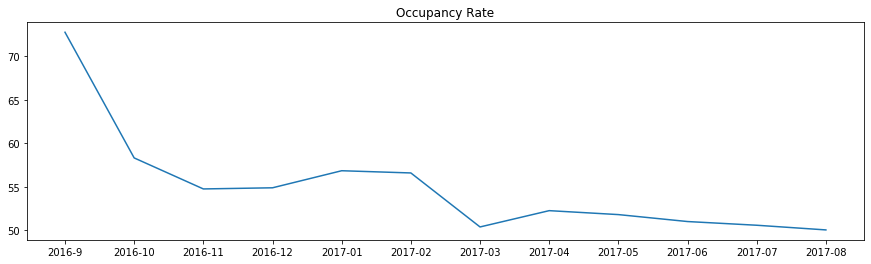

In [59]:
plt.figure(figsize=(15,4))
plt.plot(list(occRateDict.keys()),list(occRateDict.values()));
plt.title("Occupancy Rate");

In [60]:
#Sharp decline in occupancy rates seems to forced airbnb host to decrease thier prices. 

# Question 3: Does high review score correlated with occupancy rate?

In [61]:
bos_listing.shape

(3585, 95)

In [62]:
#Filtered out hosts that has less than 5 reviews.
bos_listing1=bos_listing[bos_listing["number_of_reviews"] > 5]

In [63]:
bos_listing1.shape

(1758, 95)

In [64]:
bos_listing1["price"]=bos_listing1["price"].apply(returnPricesAsInt) #convert price columns data type


C:\Users\09775\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


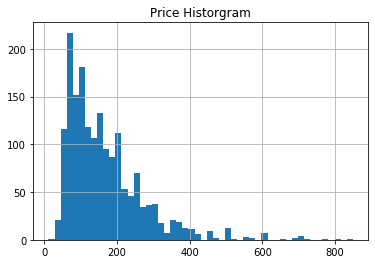

In [68]:
bos_listing1["price"].hist(bins=50);
plt.title("Price Historgram");

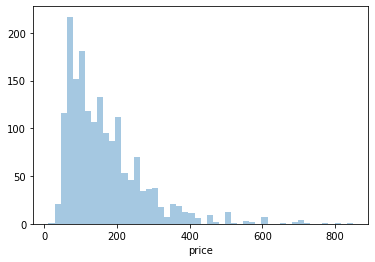

In [69]:
sns.distplot(bos_listing1["price"], bins=50,kde=False);

In [70]:
#To seperate dataframe in to 50 buckets I created bin_edges list.
bin_edges = np.linspace(bos_listing1["price"].min(),bos_listing1["price"].max(),50)

In [71]:
bos_listing1["price"] = pd.cut(bos_listing1["price"], bin_edges)

C:\Users\09775\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
x = np.linspace(20,841,40) #Average airbnb prices

In [73]:
bos_price_rating=bos_listing1.groupby("price").mean().review_scores_rating.dropna() #dropped bins without review score.

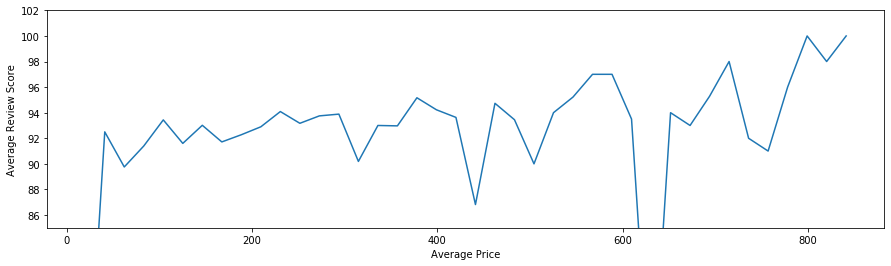

In [74]:
plt.figure(figsize=(15,4))
plt.ylim(85,102)
plt.ylabel("Average Review Score")
plt.xlabel("Average Price")
plt.plot(x,bos_price_rating.values);

In [77]:
#obviously as the price goes up customer expectations are also goes up. To satisfy that much expectation your service
#must be offer unique things. 

# Question 4: Does high review score increase your occupancy rate.

In [82]:
#It seems high review score lead you to increase your price tag. So what about occupancy rates, does high review scores
#lead high occupancy rates?

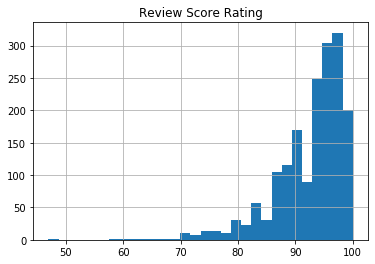

In [83]:
bos_listing1["review_scores_rating"].hist(bins=30);
plt.title("Review Score Rating");

In [84]:
bos_listing1["review_scores_rating"].describe()

count    1758.000000
mean       92.502275
std         6.378031
min        47.000000
25%        90.000000
50%        94.000000
75%        97.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [86]:
#To see the correlation between review score and occupancy rate, I seperated the data into 4 buckets which respect to
#review scores.
bin_edges = [47, 90, 94, 97, 100]
bin_labels = ["low", "medium", "mod_high", "high"]

In [87]:
bos_listing1["review_scores"] = pd.cut(bos_listing1["review_scores_rating"],bin_edges,labels=bin_labels)

C:\Users\09775\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
low_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "low"]
medium_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "medium"]
modHigh_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "mod_high"]
high_score_ids = bos_listing1["id"][bos_listing1["review_scores"] == "high"]

In [89]:
len(low_score_ids) #data points seems evenly distributed

509

In [95]:
len(medium_score_ids)  #data points seems evenly distributed

424

In [96]:
len(modHigh_score_ids)  #data points seems evenly distributed

471

In [97]:
len(high_score_ids) #data points seems evenly distributed 

353

In [98]:
bos_cal1.head()

,listing_id,available,price
date,,,
2017-09-05,12147973,f,NaN
2017-09-04,12147973,f,NaN
2017-09-03,12147973,f,NaN
2017-09-02,12147973,f,NaN
2017-09-01,12147973,f,NaN


In [99]:
#Calculated occupancy rate for one unique listing_id
bos_cal1[bos_cal1["listing_id"]==12147973]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==12147973]["available"].shape[0]

1.0

In [100]:
#Calculated average occupancy rate for hosts that have low review score
low_score_occ_list = []
for id in low_score_ids:
    low_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

low_score_mean = sum(low_score_occ_list)/len(low_score_occ_list)
low_score_mean


0.8581478590844264

In [101]:
#Calculated average occupancy rate for hosts that have medium review score
medium_score_occ_list = []
for id in medium_score_ids:
    medium_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

medium_score_mean = sum(medium_score_occ_list)/len(medium_score_occ_list)
medium_score_mean


0.8427371413802022

In [102]:
#Calculated average occupancy rate for hosts that have mod_high review score
modHigh_score_occ_list = []
for id in modHigh_score_ids:
    modHigh_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

modHigh_score_mean = sum(modHigh_score_occ_list)/len(modHigh_score_occ_list)
modHigh_score_mean


0.8346799290346973

In [103]:
#Calculated average occupancy rate for hosts that have high review score
high_score_occ_list = []
for id in high_score_ids:
    high_score_occ_list.append(bos_cal1[bos_cal1["listing_id"]==id]["available"].value_counts()[0]/bos_cal1[bos_cal1["listing_id"]==id]["available"].shape[0])

high_score_mean = sum(high_score_occ_list)/len(high_score_occ_list)
high_score_mean


0.8394815475959487

In [104]:
labels = bin_labels
occupancy_rates = [low_score_mean, medium_score_mean, modHigh_score_mean, high_score_mean]

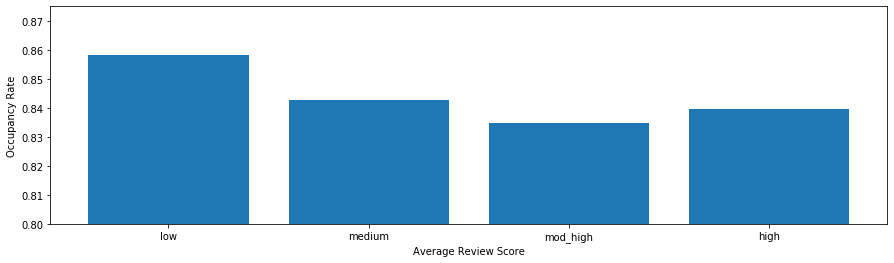

In [105]:
plt.figure(figsize=(15,4))
plt.ylim(0.8,0.875)
plt.ylabel("Occupancy Rate")
plt.xlabel("Average Review Score")
plt.bar(height=occupancy_rates,x=labels);

In [106]:
#It seems review score doesn't guarantee you high occupancy rates.

# Question 5: Does paying more cause you to review more?

In [107]:
bos_price_review_rate = bos_listing1.groupby("price").mean().reviews_per_month.dropna()

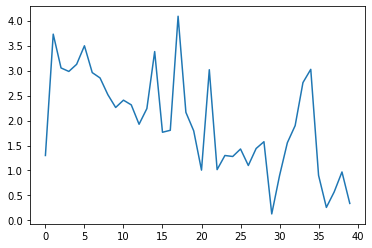

In [108]:
plt.plot(bos_price_review_rate.values)